**Informacje o danych**

In [ ]:
import csv
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from numpy import load
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Przykładowe dane w datasecie

In [ ]:
file = open("adult.csv", 'r')
data = read_csv(file)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Nazwy cech i ich typy, wraz z ilością wierszy oraz kolumn



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Usuwamy kolumnę educational-enum ponieważ jest podobna do kolumny education

In [ ]:
data.drop("educational-num", axis = 1, inplace = True)

Sprawdzamy zawartości kolumn

In [ ]:
for column in data:
  print(data[column].value_counts())

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-

Usuwamy kolumny capital-gain oraz capital-loss, zdecydowana większość tych wartości jest równa zero

In [ ]:
data.drop(["capital-gain", "capital-loss"], axis = 1, inplace = True)

In [ ]:
data.describe(include = 'all')

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842,48842,48842,48842,48842,48842.000000,48842,48842
unique,NaN,9,NaN,16,7,15,6,5,2,NaN,42,2
top,NaN,Private,NaN,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,22379,6172,19716,41762,32650,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,NaN,NaN,NaN,NaN,NaN,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


Ilość braków

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

Wartości nieznane aktualnie są reprezentowane jako "?", należy je zamienić na NaN, a następnie usunąć, zajmiemy się również usuwaniem duplikatów jeśli takowe występują

In [ ]:
data.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [ ]:
data = data.replace("?", numpy.nan)
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,103497,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


<Axes: >

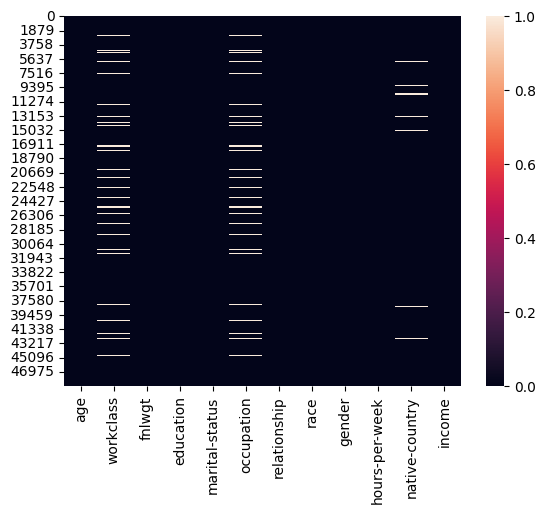

In [ ]:
seaborn.heatmap(data.isnull())

In [ ]:
data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [ ]:
print("Data set before removing missing values: " + str(data.shape))
data.dropna(how = 'any', inplace = True)
print("Data set after removing missing values: " + str(data.shape))
data.isna().sum()

Zestaw przed usunięciem danych brakujących: (48842, 12)
Zestaw po usunięciu danych brakujących: (45222, 12)


age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

<Axes: >

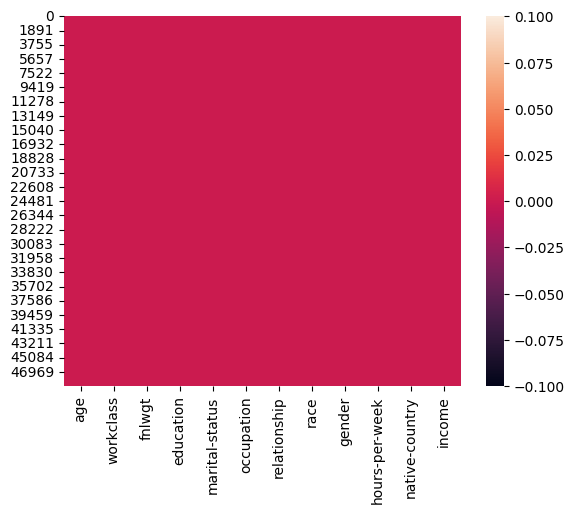

In [ ]:
seaborn.heatmap(data.isnull())

In [ ]:
data.duplicated().sum()

55

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.describe(include = 'all')

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
count,45167.000000,45167,4.516700e+04,45167,45167,45167,45167,45167,45167,45167.000000,45167,45167
unique,NaN,7,NaN,16,7,14,6,5,2,NaN,41,2
top,NaN,Private,NaN,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,33255,NaN,14768,21037,6009,18648,38852,30488,NaN,41249,33967
mean,38.556424,NaN,1.897383e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.942325,NaN,NaN
std,13.215796,NaN,1.056451e+05,NaN,NaN,NaN,NaN,NaN,NaN,12.007731,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


Wartości odstające i ich usunięcie

In [ ]:
q1 = data.quantile(0.15, numeric_only = True)
q3 = data.quantile(0.85, numeric_only = True)
iqr = q3 - q1

print("Data set size before removing outliers " + str(data.shape[0]))
data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]
print("Data set size after removing outliers " + str(data.shape[0]))

Rozmiar zbioru z wartościami odstającymi 45167
Rozmiar zbioru po usunięciu wartości odstających 44312


<ipython-input-181-22be4b260b71>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]


Zamiana wartości kategorycznych na numeryczne

In [ ]:
lab_enc = LabelEncoder()
categorical_data = data.select_dtypes(object)
numerical_data = data.select_dtypes(int, float)
for column in categorical_data:
    categorical_data[column] = lab_enc.fit_transform(categorical_data[column])

data = pandas.concat([categorical_data, numerical_data], axis = 1)
data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,age,fnlwgt,hours-per-week
0,2,1,4,6,3,2,1,38,0,25,226802,40
1,2,11,2,4,0,4,1,38,0,38,89814,50
2,1,7,2,10,0,4,1,38,1,28,336951,40
3,2,15,2,6,0,2,1,38,1,44,160323,40
5,2,0,4,7,1,4,1,38,0,34,198693,30
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,7,2,12,5,4,0,38,0,27,257302,38
48838,2,11,2,6,0,4,1,38,1,40,154374,40
48839,2,11,6,0,4,4,0,38,0,58,151910,40
48840,2,11,4,0,3,4,1,38,0,22,201490,20


Wizualizacja

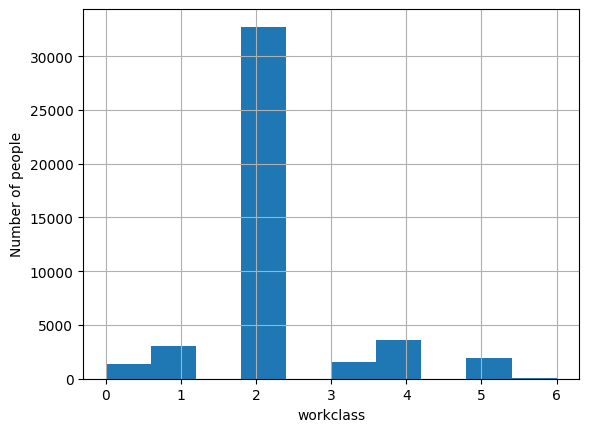

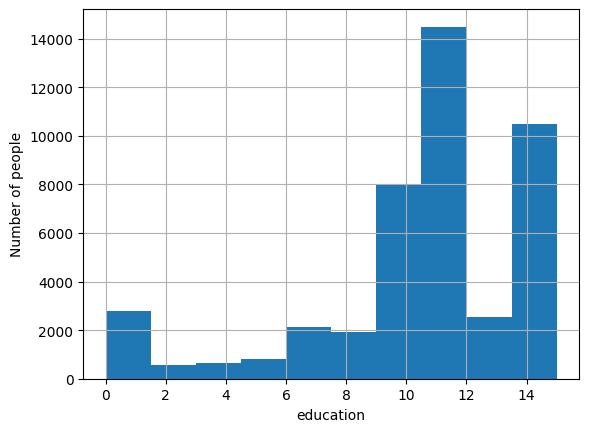

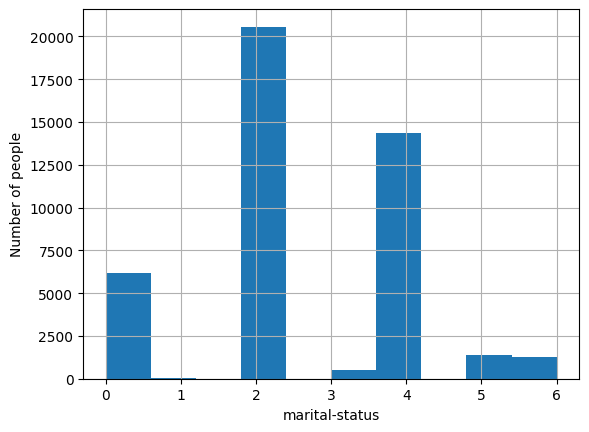

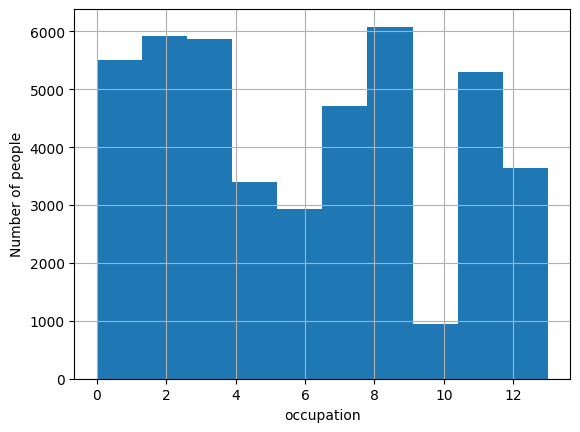

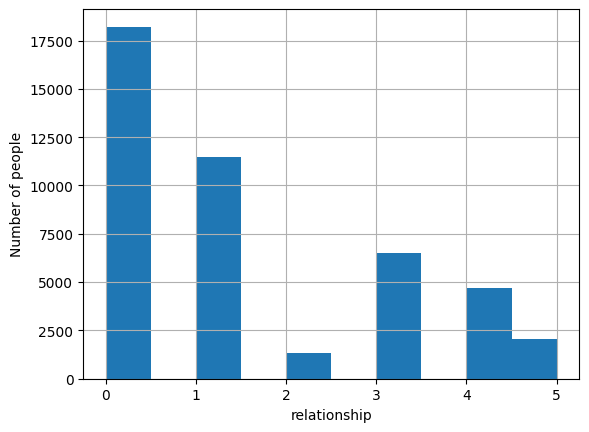

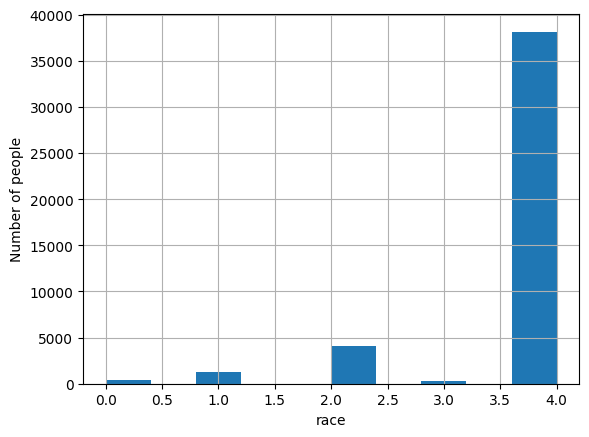

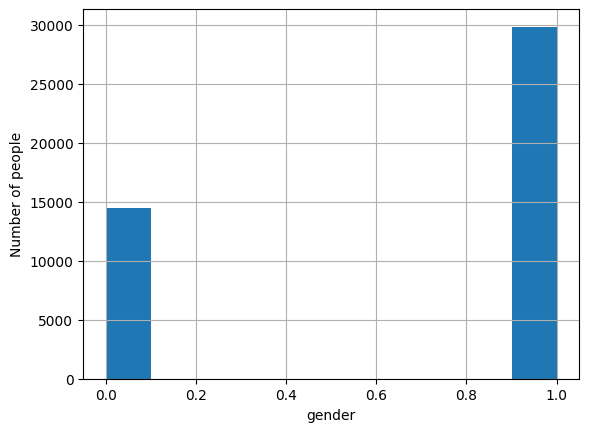

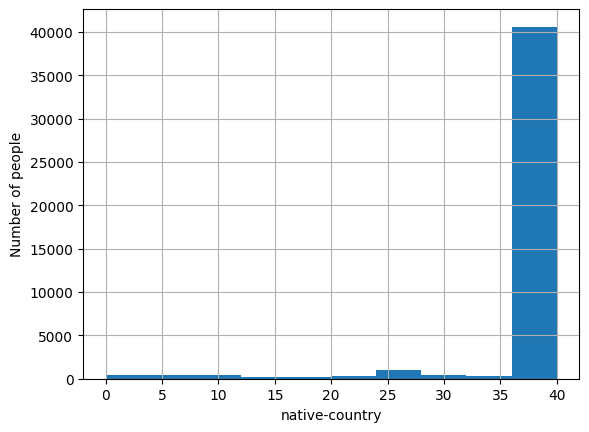

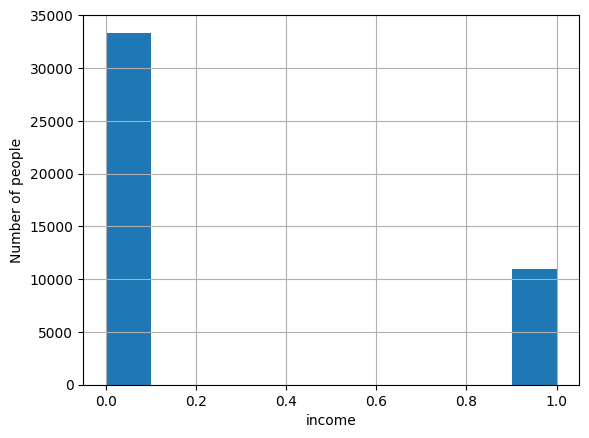

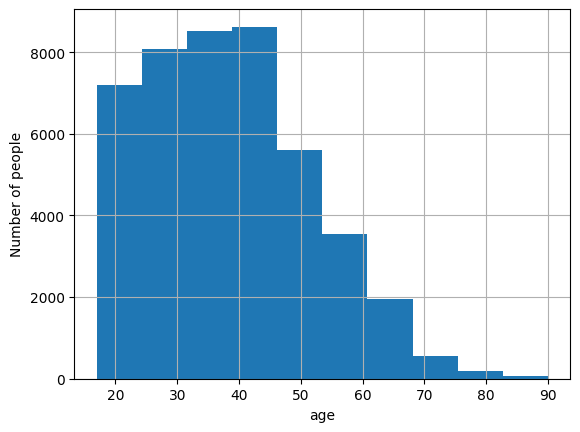

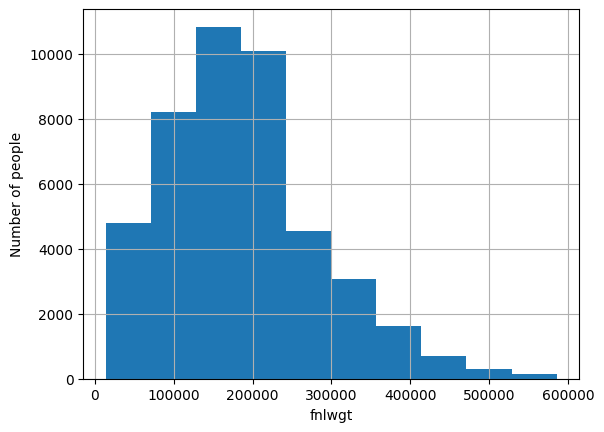

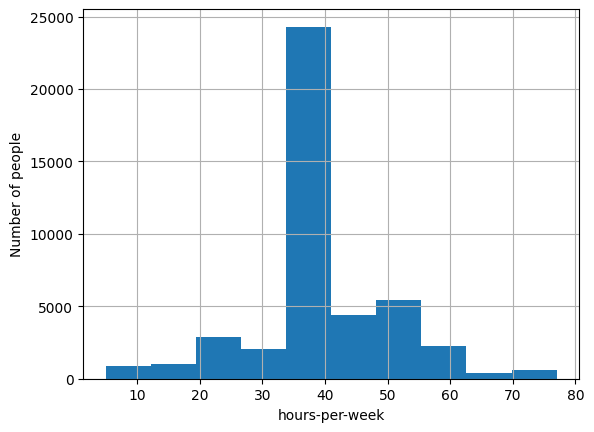

In [ ]:
for column in data:
  data[column].hist()
  plt.xlabel(column)
  plt.ylabel("Number of people")
  plt.show()

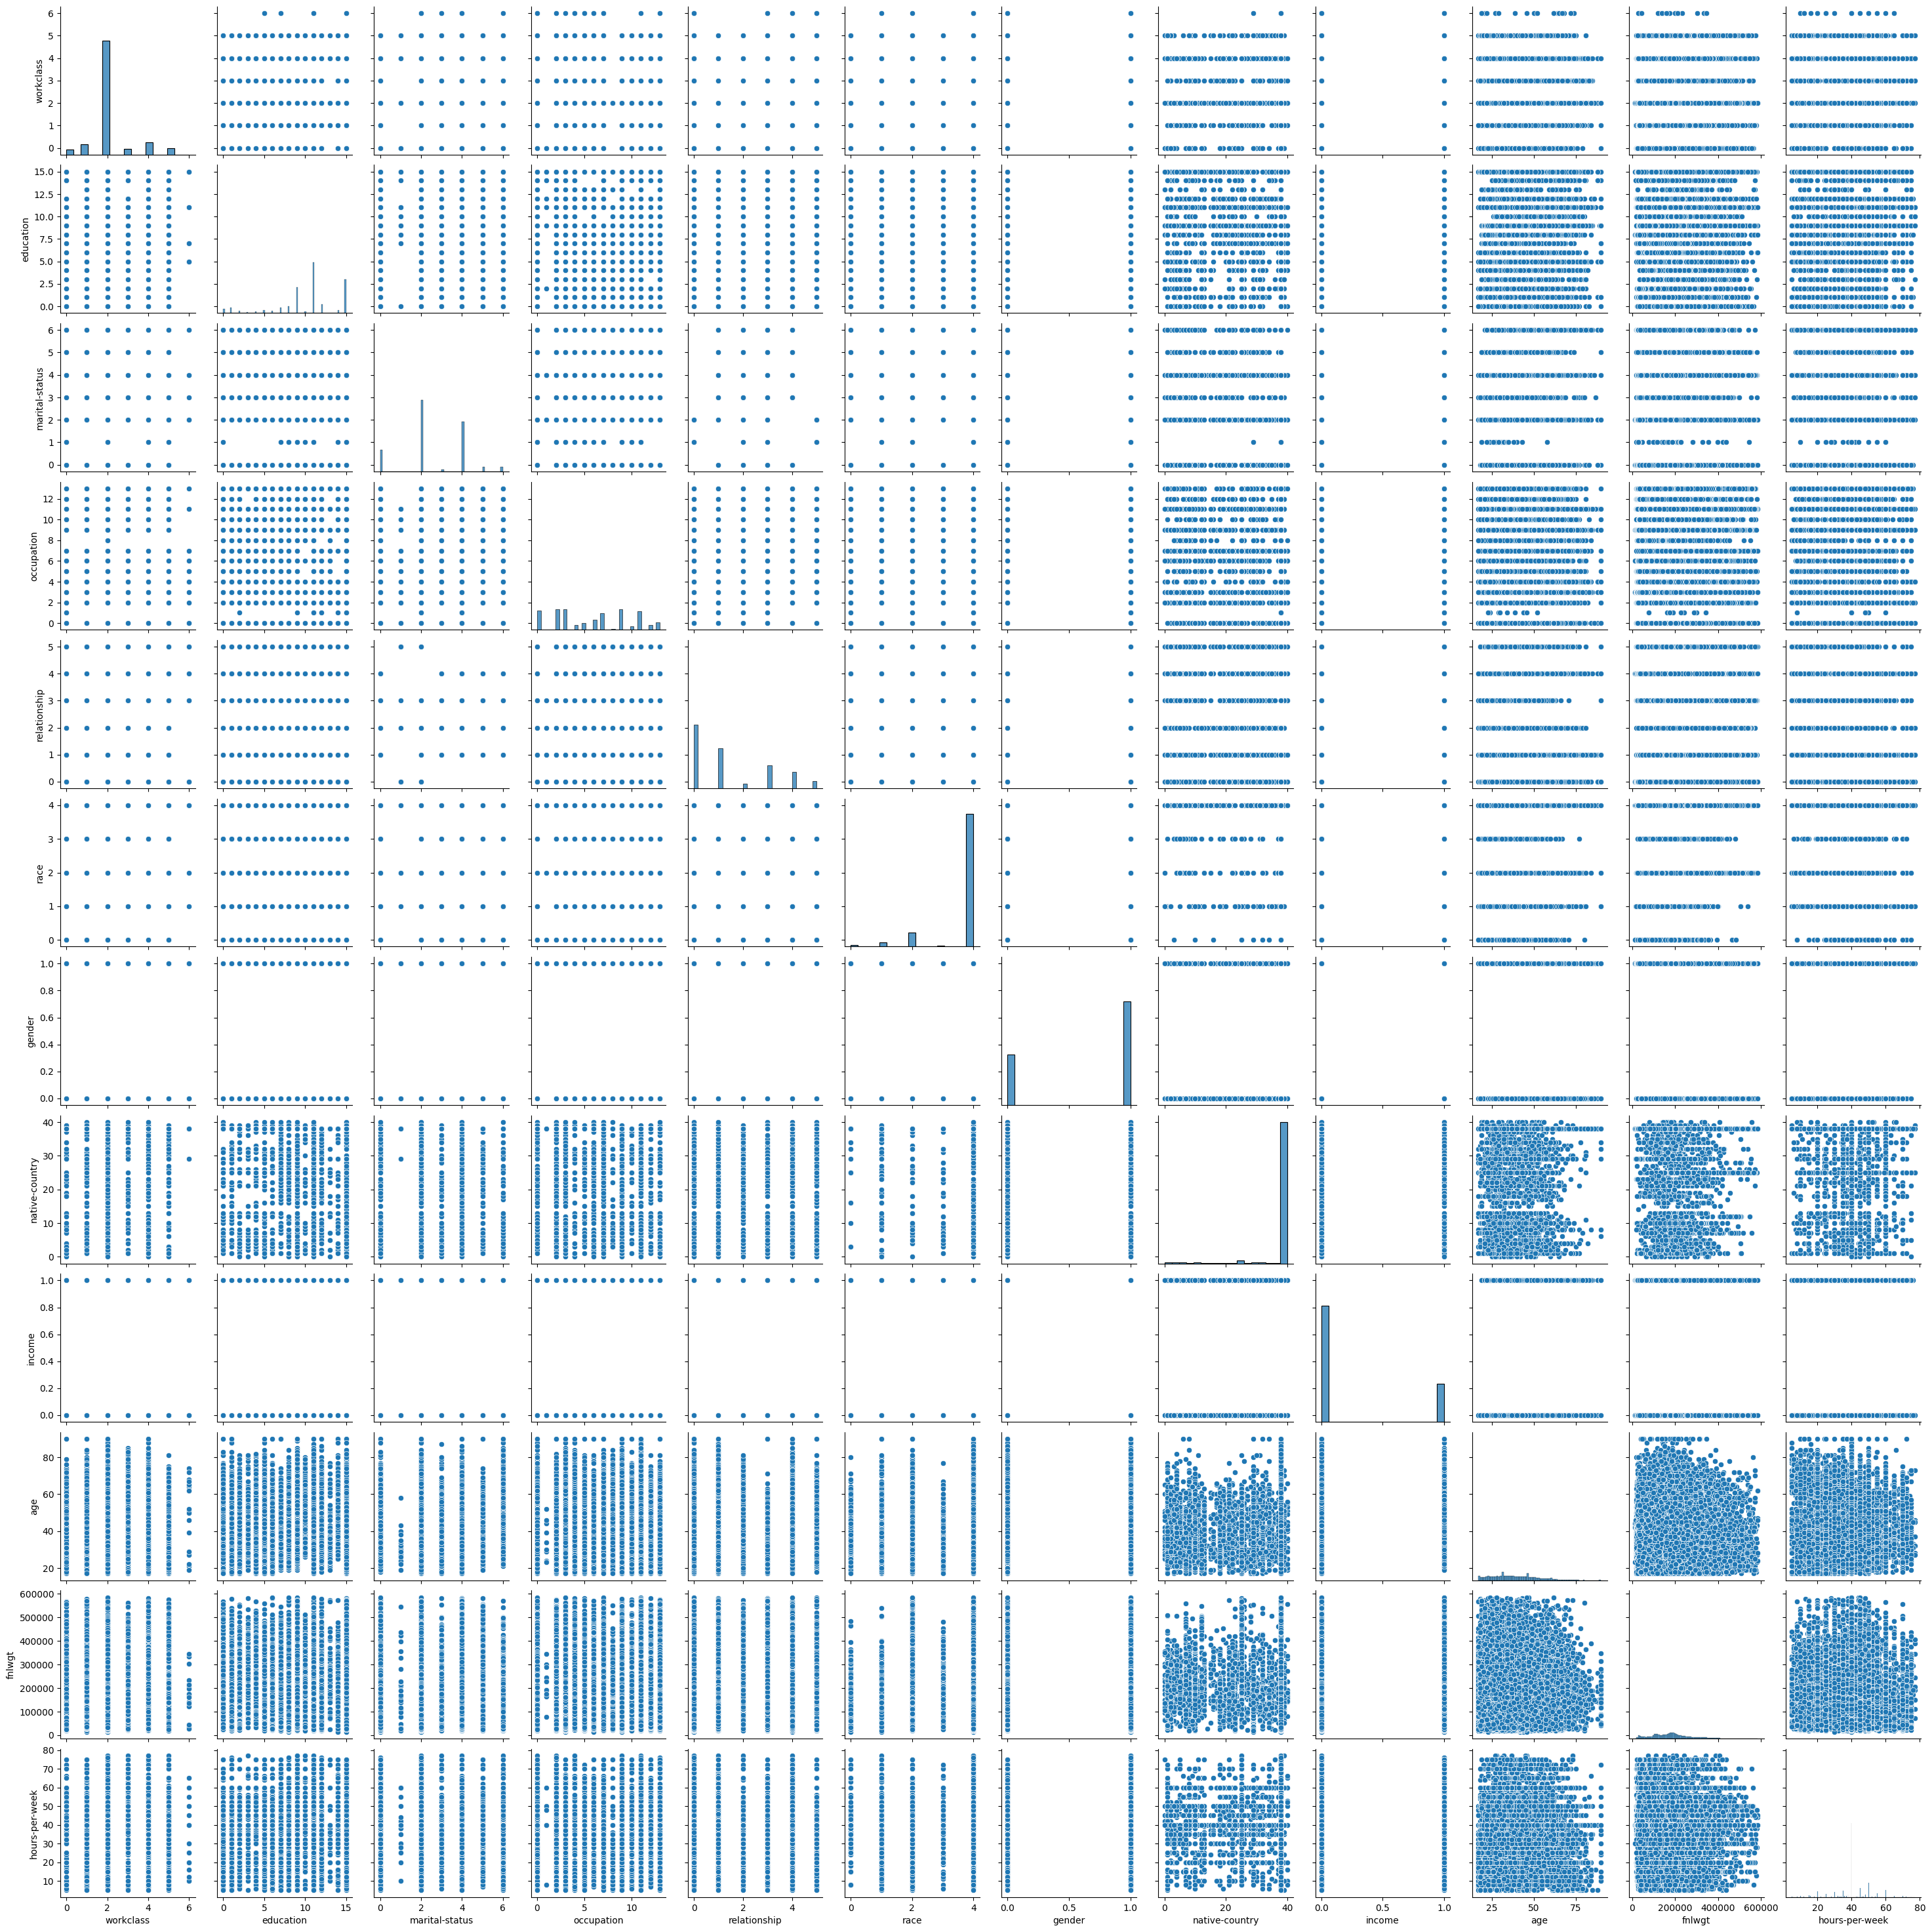

In [ ]:
seaborn.pairplot(data)


In [ ]:
x = data[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'age', 'fnlwgt', 'hours-per-week']]
y = data['income']

Korelacja danych

<Axes: >

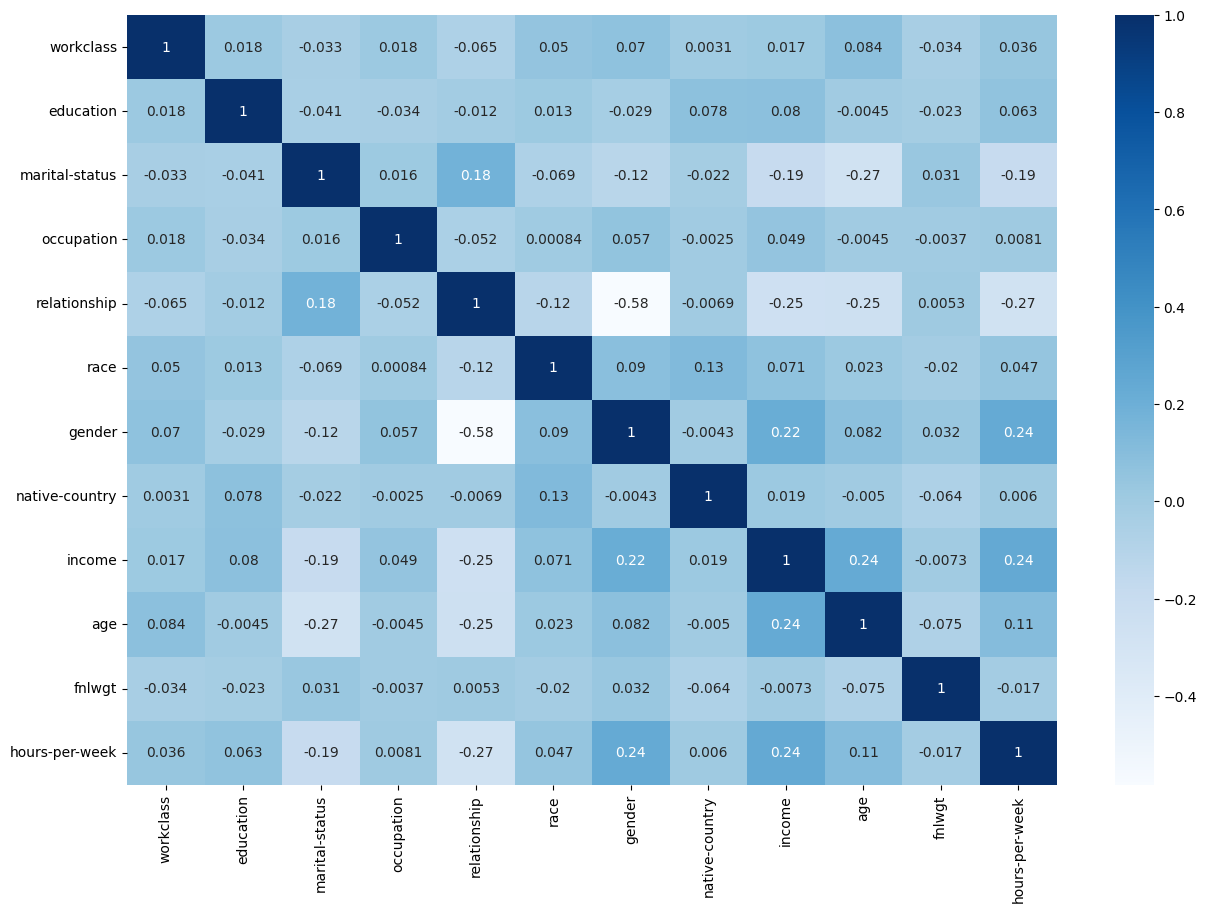

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(data.corr(), annot=True, cmap='Blues')

In [ ]:
data.shape

(44312, 12)

Podział danych trenujących i testowych oraz skalowanie

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Model KNN

In [ ]:
error_rate = []

for i in range(1, 21):

    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, x, y, cv=10)
    error_rate.append(1 - score.mean())

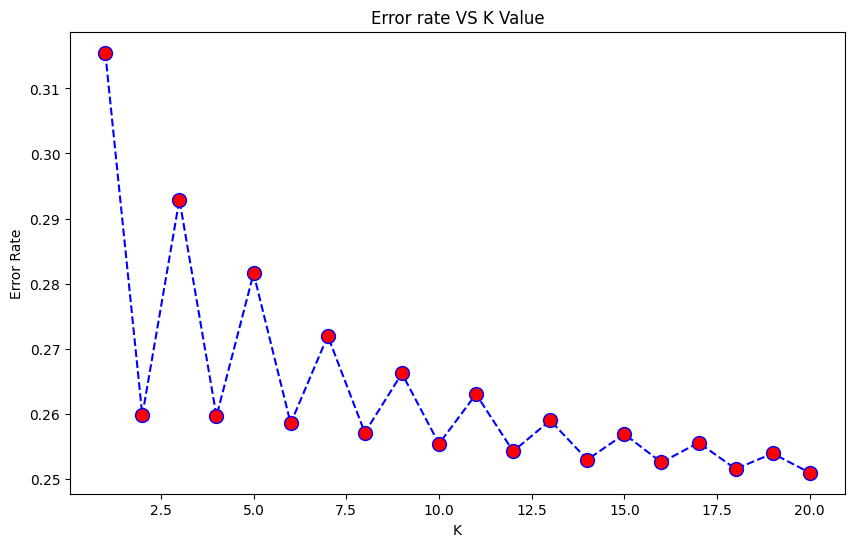

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Best Hyperparameters::
{'n_neighbors': 23, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6691
           1       0.65      0.50      0.57      2172

    accuracy                           0.81      8863
   macro avg       0.75      0.71      0.72      8863
weighted avg       0.80      0.81      0.80      8863

Confusion Matrix:
 [[6116  575]
 [1083 1089]]


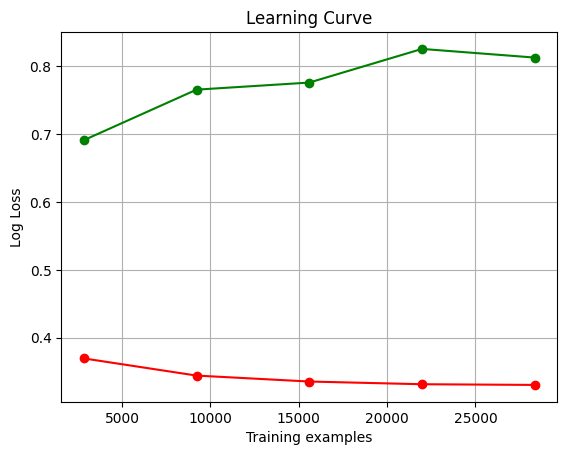

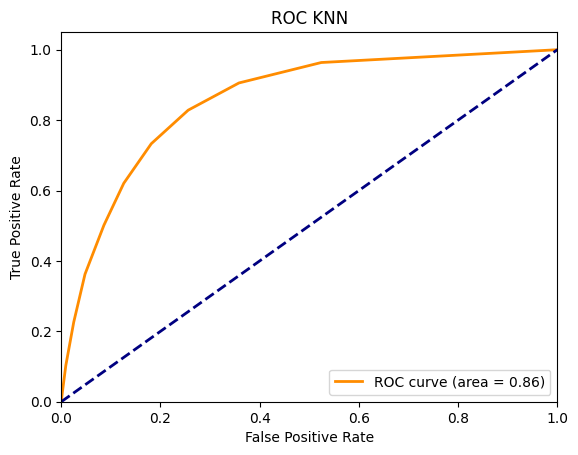

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
y_pred_proba = model.predict_proba(x_test)[::,1]

y_pred = model.predict(x_test)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_log_loss')

train_scores_mean = -numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
test_scores_mean = -numpy.mean(test_scores, axis=1)
test_scores_std = numpy.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

param_grid = {'n_neighbors': list(range(15, 25)), 'weights': ['uniform', 'distance']}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid.fit(x_train, y_train)

model = grid.best_estimator_

print("Best Hyperparameters::\n{}".format(grid.best_params_))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(loc="lower right")
plt.show()

Model Logistic Regression

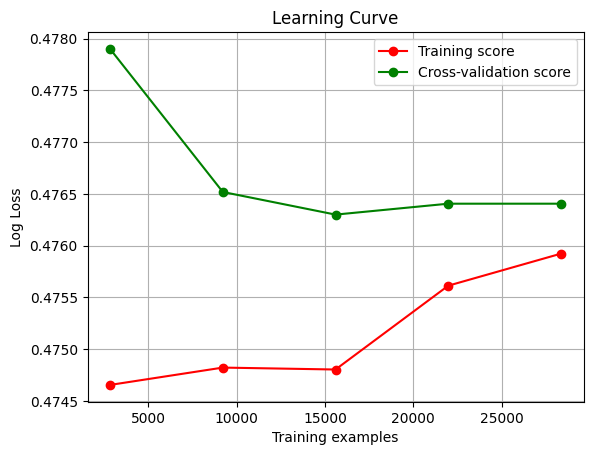

Best Hyperparameters::
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.78      0.94      0.86      6691
           1       0.53      0.19      0.28      2172

    accuracy                           0.76      8863
   macro avg       0.65      0.57      0.57      8863
weighted avg       0.72      0.76      0.71      8863

Confusion Matrix:
 [[6318  373]
 [1757  415]]


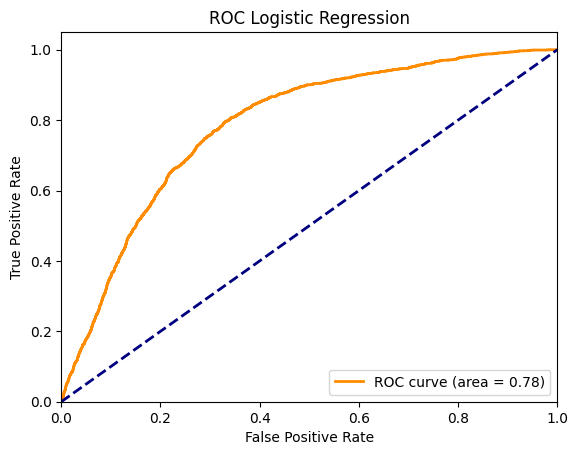

In [ ]:
model = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_log_loss')

train_scores_mean = -numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
test_scores_mean = -numpy.mean(test_scores, axis=1)
test_scores_std = numpy.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid.fit(x_train, y_train)

model = grid.best_estimator_

print("Best Hyperparameters::\n{}".format(grid.best_params_))

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Model Decision Tree

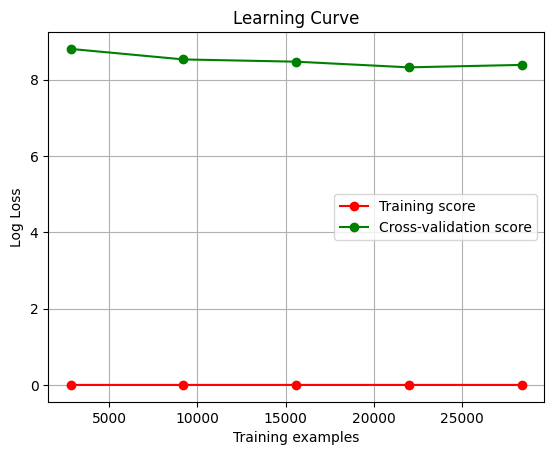

Best Hyperparameters::
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6691
           1       0.65      0.61      0.63      2172

    accuracy                           0.83      8863
   macro avg       0.77      0.75      0.76      8863
weighted avg       0.82      0.83      0.82      8863

Confusion Matrix:
 [[5985  706]
 [ 838 1334]]


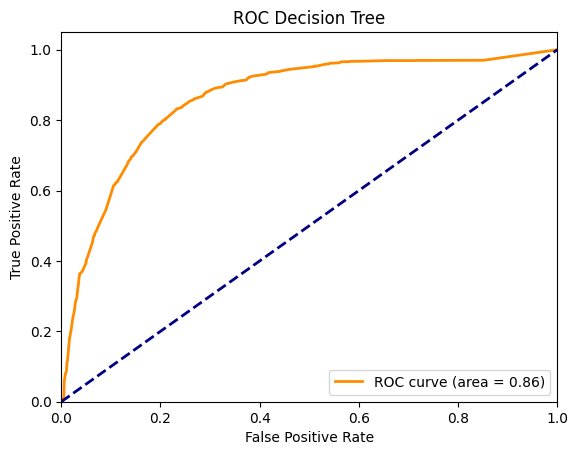

In [ ]:
model = DecisionTreeClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_log_loss')

train_scores_mean = -numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
test_scores_mean = -numpy.mean(test_scores, axis=1)
test_scores_std = numpy.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

param_grid = {'max_depth': [3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

model = grid.best_estimator_

print("Best Hyperparameters::\n{}".format(grid.best_params_))

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Decision Tree')
plt.legend(loc="lower right")
plt.show()

Model Random Forest

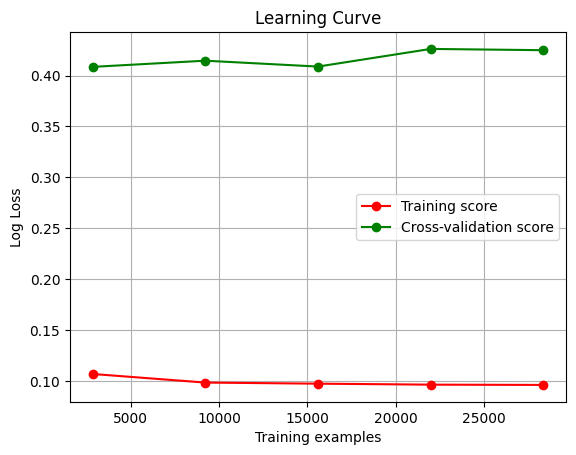

Best Hyperparameters::
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6691
           1       0.71      0.58      0.64      2172

    accuracy                           0.84      8863
   macro avg       0.79      0.75      0.77      8863
weighted avg       0.83      0.84      0.83      8863

Confusion Matrix:
 [[6184  507]
 [ 914 1258]]


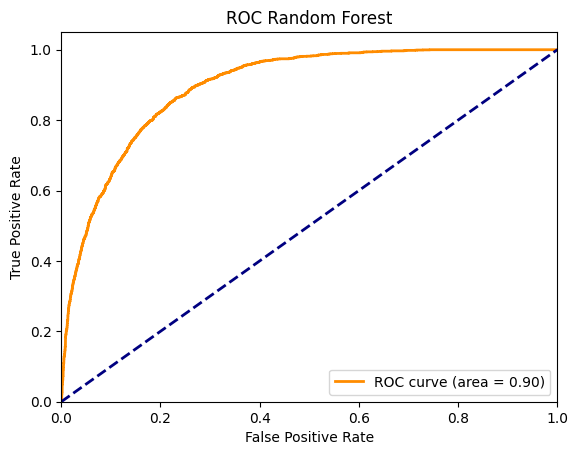

In [ ]:
model = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_log_loss')

train_scores_mean = -numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
test_scores_mean = -numpy.mean(test_scores, axis=1)
test_scores_std = numpy.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2, 4]}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

model = grid.best_estimator_

print("Best Hyperparameters::\n{}".format(grid.best_params_))

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

Model Gradient Boosting Classifier

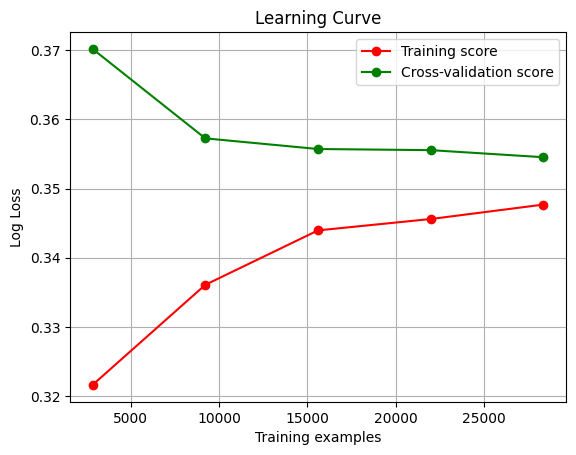

Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6691
           1       0.72      0.60      0.65      2172

    accuracy                           0.85      8863
   macro avg       0.80      0.76      0.78      8863
weighted avg       0.84      0.85      0.84      8863

Confusion Matrix:
 [[6199  492]
 [ 879 1293]]


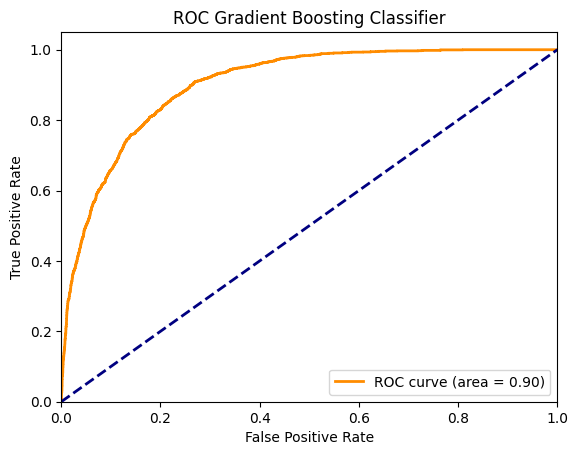

In [ ]:
model = GradientBoostingClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_log_loss')

train_scores_mean = -numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
test_scores_mean = -numpy.mean(test_scores, axis=1)
test_scores_std = numpy.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 3, 5]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

model = grid.best_estimator_

print("Best Hyperparameters::\n{}".format(grid.best_params_))

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()